<a href="https://colab.research.google.com/github/JiwooLee0822/transformer/blob/main/Transformer_dataset_%26_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset & Process

### 1. Load dataset

In [1]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 493.7/493.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 12.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

In [3]:
from datasets import load_dataset

dataset = load_dataset("iwslt2017", "iwslt2017-en-de")

Generating train split:   0%|          | 0/206112 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8079 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/888 [00:00<?, ? examples/s]

In [4]:
# dict 형태

dataset

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 206112
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 8079
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 888
    })
})

In [5]:
train_data = dataset['train']['translation']
test_data = dataset['test']['translation']
val_data = dataset['validation']['translation']

In [6]:
train_data[0]

{'de': 'Vielen Dank, Chris.', 'en': 'Thank you so much, Chris.'}

In [7]:
def split_de_en(data):
  split_list = []
  for i in data:
    split_list.append([i['de'], i['en']])
  return split_list

In [8]:
train = split_de_en(train_data)
test = split_de_en(test_data)
val = split_de_en(val_data)

In [9]:
train_df = pd.DataFrame(train, columns = ['de', 'en'])
test_df = pd.DataFrame(test, columns = ['de', 'en'])
val_df = pd.DataFrame(val, columns = ['de', 'en'])

In [10]:
train_df

,de,en
0,"Vielen Dank, Chris.","Thank you so much, Chris."
1,"Es ist mir wirklich eine Ehre, zweimal auf die...",And it's truly a great honor to have the oppor...
2,Ich bin wirklich begeistert von dieser Konfere...,"I have been blown away by this conference, and..."
3,"Das meine ich ernst, teilweise deshalb -- weil...","And I say that sincerely, partly because I ne..."
4,Versetzen Sie sich mal in meine Lage!,Put yourselves in my position.
...,...,...
206107,Den alten Griechen fiel auch nicht eines Tages...,The Ancient Greeks didn't just wake up one day...
206108,"Wir Menschen brauchten Jahrhunderte, um Sachen...","It took centuries, even, for humans to realize..."
206109,Deshalb müssen wir unser Verständnis von Norma...,And so we must continuously challenge our noti...
206110,Figuren: Danke. Danke. Danke. Danke. Danke.,Characters: Thank you. Thank you. Thank you. T...


In [11]:
# sentencepeice 사용할 수 있도록 df를 txt 파일 생성

train_df.to_csv('train_df.txt', sep="\t")

In [12]:
# 파일 생성 확인
f = open('train_df.txt', 'r')
lines = f.readlines()
f.close()

i=0

for line in lines:
  i+=1
  print(line)
  if i == 10:
    break

	de	en

0	Vielen Dank, Chris.	Thank you so much, Chris.

1	Es ist mir wirklich eine Ehre, zweimal auf dieser Bühne stehen zu dürfen. Tausend Dank dafür.	And it's truly a great honor to have the opportunity to come to this stage twice; I'm extremely grateful.

2	Ich bin wirklich begeistert von dieser Konferenz, und ich danke Ihnen allen für die vielen netten Kommentare zu meiner Rede vorgestern Abend.	I have been blown away by this conference, and I want to thank all of you for the many nice comments about what I had to say the other night.

3	Das meine ich ernst, teilweise deshalb -- weil ich es wirklich brauchen kann!	And I say that sincerely, partly because  I need that.

4	Versetzen Sie sich mal in meine Lage!	Put yourselves in my position.

5	Ich bin bin acht Jahre lang mit der Air Force Two geflogen.	I flew on Air Force Two for eight years.

6	Jetzt muss ich meine Schuhe ausziehen, um überhaupt an Bord zu kommen!	Now I have to take off my shoes or boots to get on an airplane!

7	I

## 2. SentencePeice module (byte-pair-encoding; BPE)

[참고 자료]

https://wikidocs.net/86657

In [13]:
! pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.5 MB/s eta 0:00:00


In [14]:
import sentencepiece as spm

In [15]:
# bpe 활용해 tokenize 진행
# .vocab .model 생성됨
# 각 단어에 고유 정수 부여

spm.SentencePieceTrainer.Train('--input=train_df.txt --model_prefix=my_bpe --model_type=bpe')

In [16]:
import csv

#vocab 파일에서 학습된 subword들 확인

vocab_list = pd.read_csv('my_bpe.vocab', sep='\t', quoting=csv.QUOTE_NONE)
vocab_list.sample(10)

,<unk>,0
6577,▁sus,-6575
6424,▁vern,-6422
4041,▁changes,-4039
2369,▁answer,-2367
1355,▁darüber,-1353
4698,▁benef,-4696
3667,▁Su,-3665
3397,▁dein,-3395
7750,284,-7748
4878,wirtschaft,-4876


In [17]:
# 단어 집합 크기
len(vocab_list)

7999

In [18]:
# model 파일 로드
# 단어 시컨스를 정수 시퀀스로 바꾸는 인코딩 작업이나 반대로 변환하는 디코딩 작업 진행 가능

sp = spm.SentencePieceProcessor()
sp.load("my_bpe.model")

True

In [19]:
# 도구 테스트 진행

lines = [
  "I didn't at all think of it this way.",
  "I have waited a long time for someone to film"
]

for line in lines:
  print(line)
  print(sp.encode_as_pieces(line)) # 문자
  print(sp.encode_as_ids(line)) # 정수 시퀀스
  print()

I didn't at all think of it this way.
['▁I', '▁didn', "'", 't', '▁at', '▁all', '▁think', '▁of', '▁it', '▁this', '▁way', '.']
[41, 1263, 7963, 7927, 262, 167, 416, 55, 104, 150, 536, 7943]

I have waited a long time for someone to film
['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 220, 3171, 1472, 8, 1183, 562, 176, 2561, 48, 3299]



In [20]:
# encode: 문장으로부터 인자값에 따라 정수 시퀀스 또는 서브워드 시퀀스로 변환 가능함

print(sp.encode('I have waited a long time for someone to film', out_type=str))
print(sp.encode('I have waited a long time for someone to film', out_type=int))

['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film']
[41, 220, 3171, 1472, 8, 1183, 562, 176, 2561, 48, 3299]


In [21]:
# DecodeIds: 정수 시퀀스로부터 문장으로 변환 가능.

sp.DecodeIds([41, 141, 1364, 1120, 4, 666, 285, 92, 1078, 33, 91])

'Ihe76ioer36 um E geschou B'

In [22]:
# 서브워드 시퀀스로부터 문장으로 변환 가능.

sp.DecodePieces(['▁I', '▁have', '▁wa', 'ited', '▁a', '▁long', '▁time', '▁for', '▁someone', '▁to', '▁film'])

'I have waited a long time for someone to film'

## 3. DataLoader 생성

In [23]:
import torch
import torch.utils.data as data

In [24]:
class MYDataset(data.Dataset):
  # 필요 변수들 선언
  def __init__(self, txt, my_model):
    # model 파일 로드
    sp = spm.SentencePieceProcessor()
    sp.load(my_model)

    self.sp = sp

    self.txt = pd.read_csv(txt, delimiter = '\t', usecols = ['en', 'de'])

    self.bos_id = sp.bos_id() # begin of sentece token id
    self.eos_id = sp.eos_id() # end of sequence token id

  # length return
  def __len__(self):

    return len(self.txt)

  # index번째 data를 return하도록 코드 작성
  def __getitem__(self, idx):
    en = self.txt.iloc[idx, 0] # 첫번째 column
    de = self.txt.iloc[idx, 1] # 두번째 column
    # ids 정수 시퀀스 반환
    en_encode = [self.bos_id] + self.sp.encode_as_ids(en) + [self.eos_id]
    de_encode = [self.bos_id] + self.sp.encode_as_ids(de) + [self.eos_id]
    # copy, 입력 받은 데이터를 새로운 메모리 공간으로 복사 후 사용
    return torch.tensor(en_encode), torch.tensor(de_encode)


In [25]:
# 길이가 변하는 input을 처리하기 위해 dataloader의 collate_fn을 재정
# https://tutorials.pytorch.kr/beginner/text_sentiment_ngrams_tutorial.html
# https://velog.io/@jiyoung/torch-collatefn%EC%97%90-arguments-%EC%B6%94%EA%B0%80%ED%95%98%EA%B8%B0
# https://github.com/deeplearningzerotoall/PyTorch/blob/master/RNN/7-PackedSequence.ipynb

from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader
# Dataset은 input feature x와 label y를 input으로 받아 저장
# DataLoader는 dataset을 input으로 받아 batch size로 슬라이싱


def my_collate_fn(inputs):
  # input list 형태로 줘야함.
  # TensorDataset
  en_list, de_list = list(zip(*inputs))

  # 각각 다른 입력 길이 갖고 있으므로, 입력 최대 길이에 맞추어 zero-padding 진행.
  en_input = pad_sequence(en_list, batch_first = True) # padding_value default = 0
  de_input = pad_sequence(de_list, batch_first = True) # padding_value default = 0

  return [en_input, de_input]


In [26]:
# (Batch x Maximum_Sequence_Length)

In [27]:
# https://heekangpark.github.io/ml-shorts/pytorch-dataset-dataloader

#from torch.utils.data.distributed import DistributedSampler


## data 일부만 추출, minibatch 생성
#def create_my_dataloader(txt, my_model):
#  # dataset 생성
#  # index에 맞는 data 불러오기
#  dataset = MYDataset(txt, my_model)

#  # dataloader 생성
#  dataloader = DataLoader(
#      dataset,
#      # 불러온 dataset에서 index에 맞는 data를 적절히 섞어서 가져오기
#      sampler = DistributedSampler(dataset, shuffle=True),
#      batch_size = 5, # 1회 당 몇개의 데이터씩 분할
#      collate_fn = my_collate_fn,
#      shuffle = True # 데이터들의 순서 섞어서 분할 매 epoch마다 데이터가 섞인다. 즉 Epoch 1 Iter 1에서 모델이 보게 되는 미니배치 데이터와 Epoch 2 Iter 1에서 모델이 보게 되는 미니베치 데이터가 달라지게 된다.
#  )

#  return dataloader


In [28]:
#def create_my_dataloader(txt, my_model, is_distributed=False):
#  # dataset 생성
#  # index에 맞는 data 불러오기
#  dataset = MYDataset(txt, my_model)
#  sampler = (DistributedSampler(dataset, shuffle=True) if is_distributed else None)
#  # dataloader 생성
#  dataloader = DataLoader(
#      dataset,
#      # 불러온 dataset에서 index에 맞는 data를 적절히 섞어서 가져오기
#      sampler = sampler,
#      batch_size = 5, # 1회 당 몇개의 데이터씩 분할
#      collate_fn = my_collate_fn,
#      shuffle = True # 데이터들의 순서 섞어서 분할 매 epoch마다 데이터가 섞인다. 즉 Epoch 1 Iter 1에서 모델이 보게 되는 미니배치 데이터와 Epoch 2 Iter 1에서 모델이 보게 되는 미니베치 데이터가 달라지게 된다.
#  )

#  return dataloader

In [29]:
my_bpe_model = '/content/my_bpe.model'
train_df = '/content/train_df.txt'

In [30]:
data = pd.read_csv(train_df, delimiter = '\t', usecols = ['en', 'de'])

In [31]:
data

,de,en
0,"Vielen Dank, Chris.","Thank you so much, Chris."
1,"Es ist mir wirklich eine Ehre, zweimal auf die...",And it's truly a great honor to have the oppor...
2,Ich bin wirklich begeistert von dieser Konfere...,"I have been blown away by this conference, and..."
3,"Das meine ich ernst, teilweise deshalb -- weil...","And I say that sincerely, partly because I ne..."
4,Versetzen Sie sich mal in meine Lage!,Put yourselves in my position.
...,...,...
206107,Den alten Griechen fiel auch nicht eines Tages...,The Ancient Greeks didn't just wake up one day...
206108,"Wir Menschen brauchten Jahrhunderte, um Sachen...","It took centuries, even, for humans to realize..."
206109,Deshalb müssen wir unser Verständnis von Norma...,And so we must continuously challenge our noti...
206110,Figuren: Danke. Danke. Danke. Danke. Danke.,Characters: Thank you. Thank you. Thank you. T...


In [32]:
# https://heekangpark.github.io/ml-shorts/pytorch-dataset-dataloader

from torch.utils.data.distributed import DistributedSampler


# data 일부만 추출, 데이터셋을 미니배치 단위로 제공함
def create_my_dataloader(txt, my_model):
  # dataset 생성
  # index에 맞는 data 불러오기
  dataset = MYDataset(txt, my_model)

  # dataloader 생성
  dataloader = DataLoader(
      dataset,
      # 불러온 dataset에서 index에 맞는 data를 적절히 섞어서 가져오기
      #sampler = DistributedSampler(dataset, shuffle=True),
      batch_size = 5, # 1회 당 몇개의 데이터씩 분할
      collate_fn = my_collate_fn,
      num_workers = 4, # 데이터 로딩에 사용할 서브프로세스의 수 지정 (병렬처리를 위한 worker 수)
      shuffle = True # 데이터들의 순서 섞어서 분할 매 epoch마다 데이터가 섞인다. 즉 Epoch 1 Iter 1에서 모델이 보게 되는 미니배치 데이터와 Epoch 2 Iter 1에서 모델이 보게 되는 미니베치 데이터가 달라지게 된다.
  )

  return dataloader


In [33]:
my_dataloader = create_my_dataloader(train_df, my_bpe_model)

# data 접근하기 위한 파이썬 내장함수 next(iter())

en, de = next(iter(my_dataloader))
print(en)
print(de)

# 출력된 tesor들은 각각 영어와 독일어 문장을 표현하는 것으로,
# 각 문장은 토큰화와 인코딩 과정을 거쳐 숫자로 변환된 상태임.
# 1은 시작 토큰, 2는 종료 토큰, 0은 패딩 토큰

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


tensor([[   1,  206,  513, 2433,   78,  142, 5942, 7940,  310, 7675,  532,  194,
          197,  303, 2433,   78,  142, 7940, 2608,  133,  966,  100, 1863, 7943,
            2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   1,  611,  868,  589,  133, 1517,  942,   62, 2599, 5810,  325,   37,
          446, 3328, 2140, 7445, 2981, 5459, 7940, 4665, 5146,  734,   94, 2442,
         1586, 2263, 2585, 7197,  816,  100,  367, 3247,  513, 1244, 7943,    2],
        [   1,  649,   96, 1828, 7943, 6316, 7943,    2,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   1, 3266,  599, 1608, 1045,  136,  285, 1433, 2743, 7940, 6472,  202,
          496,  189, 3706,  994, 7940,   47,  231,  175,  728,  483,  734, 3491,
         7943,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
        [   1, 2549, 798

### 오류 발생: is_initialized() 지정해주기!

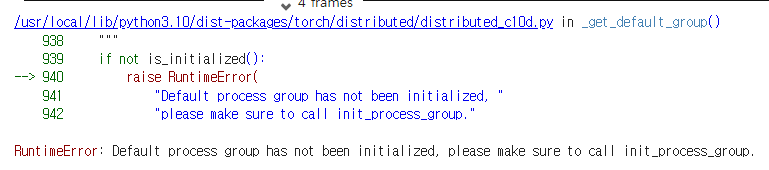